# Weather Classification System Using Images

## Team:

## Ayesha Tajammul Ahmed Mulla - amulla@iu.edu

## Bhargavi Thanneeru - bthannee@iu.edu

## Sowmya Cheedu - scheedu@iu.edu

# **Imports**

Below are the imports used in the Notebook.

In [15]:
import os
import keras 
import numpy as np
import tensorflow as tf
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from keras.preprocessing.image import ImageDataGenerator as ID
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2, ResNet50V2, ResNet50
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout,Flatten, Conv2D, MaxPool2D, BatchNormalization, Layer, ReLU, Add, InputLayer, Multiply,MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from PIL import Image

# Data Distribution

In [2]:
root_path = 'C:\\Users\\ayesh\\Desktop\\sem-1-IUB\\DM\\FINAL-PROJECT\\data-mining-project-data\\archive\\dataset'
class_labels = sorted(os.listdir(root_path))
no_of_classes = len(class_labels)
print(f"Total Number of Classes : {no_of_classes}")

Total Number of Classes : 11


In [3]:
class_images_per = [len(os.listdir(root_path + "/" + class_name)) for class_name in class_labels]
class_images_per

[698, 851, 475, 639, 591, 377, 526, 232, 1160, 692, 621]

In [11]:
path_list = [root_path + "/" + class_name for class_name in class_labels]

# Data Loading

In [4]:
train_generator = ID(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)
train_dataset = train_generator.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)
valid_dataset = train_generator.flow_from_directory(root_path, target_size=(256,256), class_mode="binary", subset='validation', shuffle=True, batch_size=32)

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


# Data Analysis

### Before Augmentation

In [5]:
fig = px.pie(names=class_labels, values=class_images_per, title="Class Distribution in %")
fig.update_layout({'title':{'x':0.5}})
fig.show()

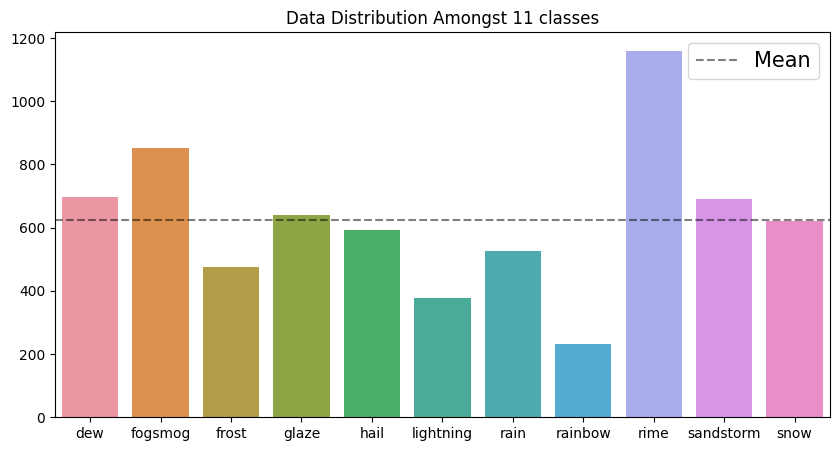

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=class_labels, 
    y=class_images_per
)
plt.axhline(np.mean(class_images_per), alpha=0.5, linestyle='--', color='k', label="Mean")
plt.title("Data Distribution Amongst 11 classes")
plt.legend(fontsize=15)
plt.show()

The classes are not equally distributed which also means that the model can be biased towards the highly occurring class

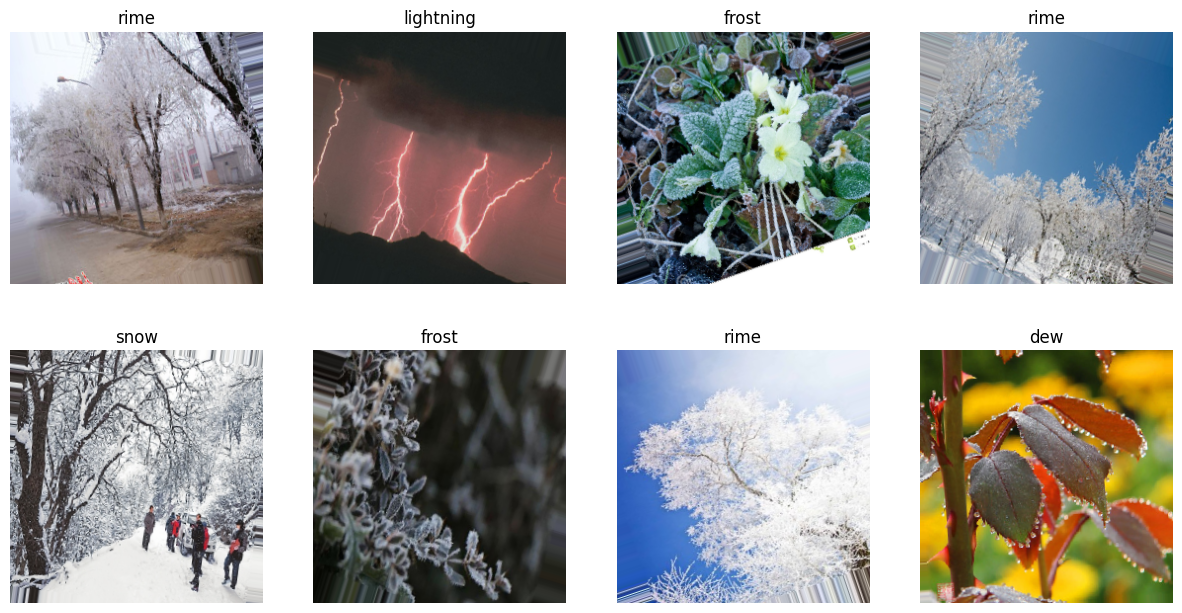

In [9]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_dataset:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])
    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(class_labels[label])
    plt.axis('off')
    i+=1
    if i>=9: break
plt.show()

# Data Augmentation

In [17]:
# def rotation(image_np_array: ndarray):
#     rot_degree = random.uniform(-25, 25)
#     return sk.transform.rotate(image_np_array, rot_degree)

# def horizontal_flip(image_np_array: ndarray):
#     return image_np_array[:, ::-1]

# transformations = {'rotate': rotation,'horizontal_flip': horizontal_flip}

# for path in path_list:
#     folder_path = path
#     num_files_desired = 500
#     images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
#     num_generated_files = 0
#     while num_generated_files <= num_files_desired:
#         image_path = random.choice(images)
#         image_to_transform = Image.open(image_path) 
#         image_to_transform = image_to_transform.convert("RGB")
#         image_to_transform = np.array(image_to_transform)
#         num_transformations_to_apply = random.randint(1, len(transformations))
#         num_transformations = 0
#         transformed_image = None
#         while num_transformations <= num_transformations_to_apply:
#             key = random.choice(list(transformations))
#             transformed_image = transformations[key](image_to_transform)
#             num_transformations += 1
#         new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)
#         io.imsave(new_file_path, transformed_image)
#         num_generated_files += 1

## Loading Augmented Data

In [18]:
root_path_aug = 'C:\\Users\\ayesh\\Desktop\\sem-1-IUB\\DM\\FINAL-PROJECT\\data-mining-project-data\\augment-data\\archive\\dataset'
class_names_aug = sorted(os.listdir(root_path))
n_classes_aug = len(class_names_aug)
print(f"Total Number of Classes : {n_classes_aug}")

Total Number of Classes : 11


In [19]:
class_dis_size_aug = [len(os.listdir(root_path_aug + "/" + name)) for name in class_names_aug]
class_dis_size_aug

[1199, 1352, 976, 1140, 1092, 878, 1027, 733, 1661, 1193, 1122]

In [20]:
train_generator_augmented = ID(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)
train_dataset_augmented = train_generator_augmented.flow_from_directory(root_path_aug, target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)
valid_dataset_augmented = train_generator_augmented.flow_from_directory(root_path_aug, target_size=(256,256), class_mode="binary", subset='validation', shuffle=True, batch_size=32)

Found 9903 images belonging to 11 classes.
Found 2470 images belonging to 11 classes.


C:\Users\ayesh\AppData\Local\Temp\ipykernel_229700\1210562941.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



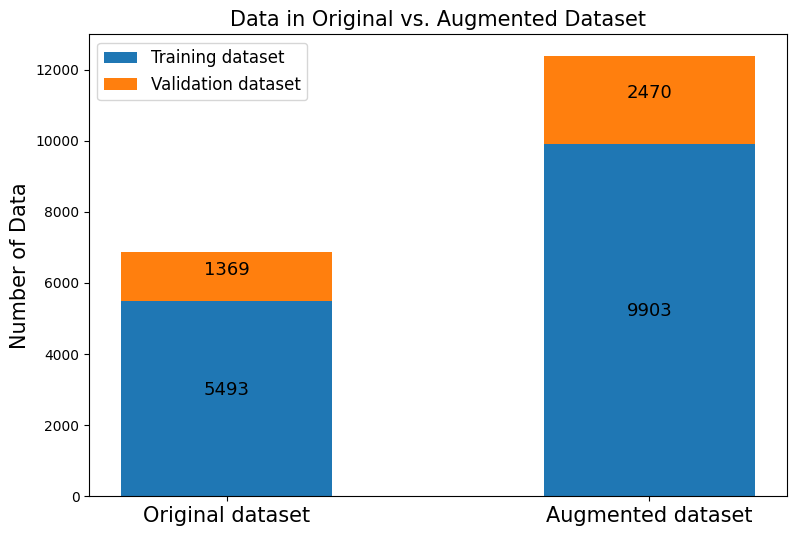

In [22]:
labels = ['Original dataset', 'Augmented dataset']
train_data_count = [5493, 9903]
valid_data_count = [1369, 2470]
width = 0.5
fig, ax = plt.subplots(figsize=(9,6))
trn_bars = ax.bar(labels, train_data_count, width, label='Training dataset')
val_bars = ax.bar(labels, valid_data_count, width, bottom=train_data_count, label='Validation dataset')
for i in range(len(trn_bars)):
    ax.annotate(str(train_data_count[i]), xy=(labels[i],train_data_count[i]/2), ha='center', va='bottom', fontsize='13')
    ax.annotate(str(valid_data_count[i]), xy=(labels[i],valid_data_count[i]/2+train_data_count[i]-63), ha='center', va='bottom', fontsize='13')
ax.set_ylabel('Number of Data', fontsize='15')
ax.set_title('Data in Original vs. Augmented Dataset', fontsize='15')
ax.set_xticklabels(labels, fontsize='15')
ax.legend(fontsize='12')
plt.show()

### After Augmentation

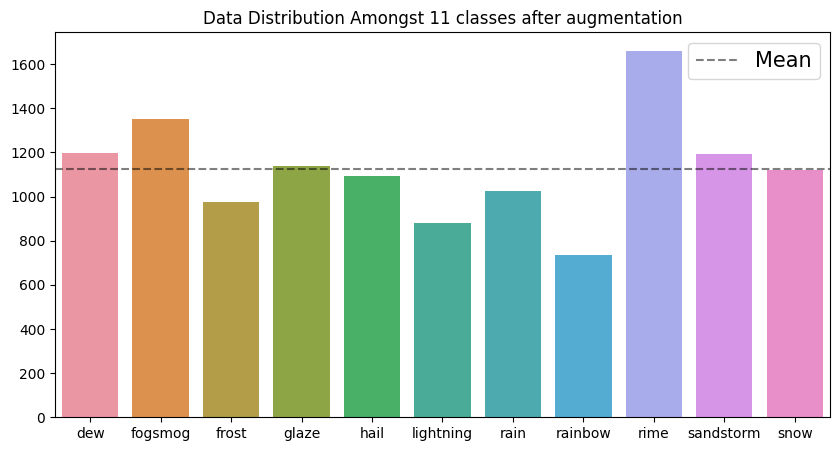

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=class_names_aug, 
    y=class_dis_size_aug
)
plt.axhline(np.mean(class_dis_size_aug), alpha=0.5, linestyle='--', color='k', label="Mean")
plt.title("Data Distribution Amongst 11 classes after augmentation")
plt.legend(fontsize=15)
plt.show()

In [24]:
fig = px.pie(names=class_names_aug, values=class_dis_size_aug, title="Class Distribution in %")
fig.update_layout({'title':{'x':0.5}})
fig.show()

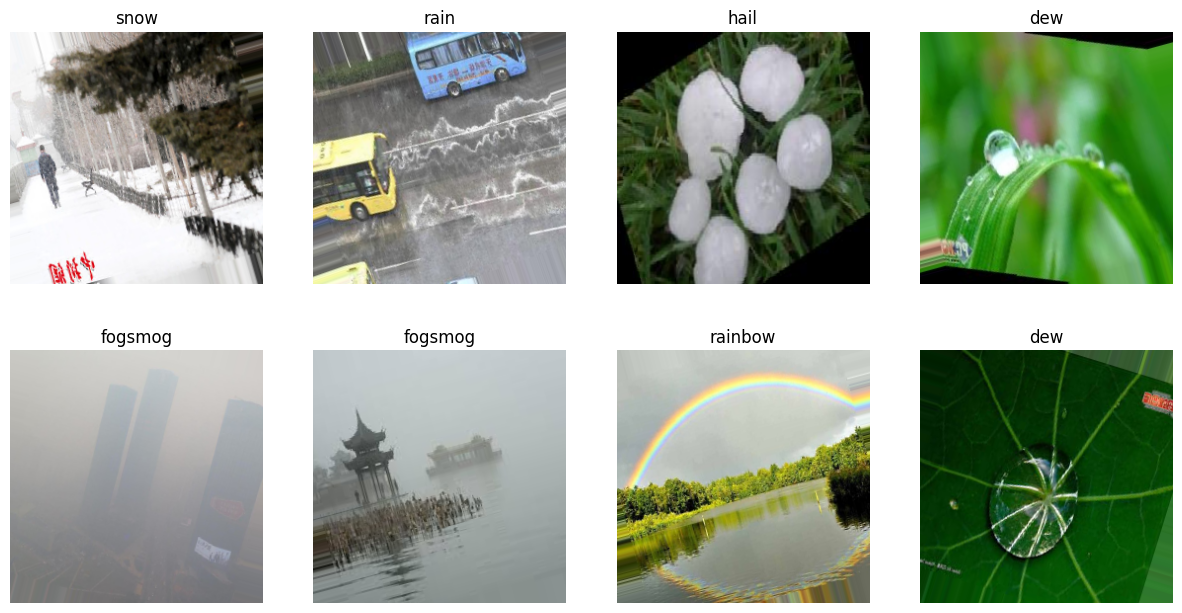

In [26]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_dataset_augmented:
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])
    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(class_names_aug[label])
    plt.axis('off')
    i+=1
    if i>=9: break
plt.show()

In [28]:
test_path = "C:\\Users\\ayesh\\Desktop\\sem-1-IUB\\DM\\FINAL-PROJECT\\test-data\\pics\\pics"
test_gen = train_generator.flow_from_directory(test_path, target_size=(256,256), class_mode="binary", subset='training', shuffle=True, batch_size=32)

Found 61 images belonging to 11 classes.


# **Data Visualization**

In [29]:
def plot_training_validation_metrics(train_data, start_epoch):
    train_acc=tr_data.history['accuracy']
    train_loss=tr_data.history['loss']
    validation_acc=tr_data.history['val_accuracy']
    validation_loss=tr_data.history['val_loss']
    epoch_count=len(train_acc)+ start_epoch
    epochs=[]
    for i in range(start_epoch ,epoch_count):
        epochs.append(i+1)   
    loss_index=np.argmin(validation_loss)
    validation_lowest=validation_loss[loss_index]
    accuracy_index=np.argmax(validation_acc)
    accuracy_highest=validation_acc[accuracy_index]
    label_sc="best epoch = "+ str(loss_index +1 +start_epoch)
    label_vc="best epoch = "+ str(accuracy_index + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(epochs,train_loss, 'r', label='Training loss')
    axes[0].plot(epochs,validation_loss,'g',label='Validation loss' )
    axes[0].scatter(loss_index+1 +start_epoch,validation_lowest, c= 'blue', label=label_sc)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot(epochs,train_acc,'r',label= 'Training Accuracy')
    axes[1].plot(epochs,validation_acc,'g',label= 'Validation Accuracy')
    axes[1].scatter(accuracy_index+1 +start_epoch,accuracy_highest,c= 'blue',label=label_vc)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.show()

# **ResNet152V2**

In [31]:
name = 'resnet'
n_classes = 11
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3))
base_model.trainable = False
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation="softmax")
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
model.fit(train_ds, epochs=10, callbacks=cbs, validation_data=valid_ds)

## Evaluation

In [69]:
model_res = load_model('C:\\Users\\ayesh\\Desktop\\sem-1-IUB\\DM\\FINAL-PROJECT\\results\\models\\model_after_aug\\resnet_aug.h5')

1/1 [==============================] - 0s 38ms/step


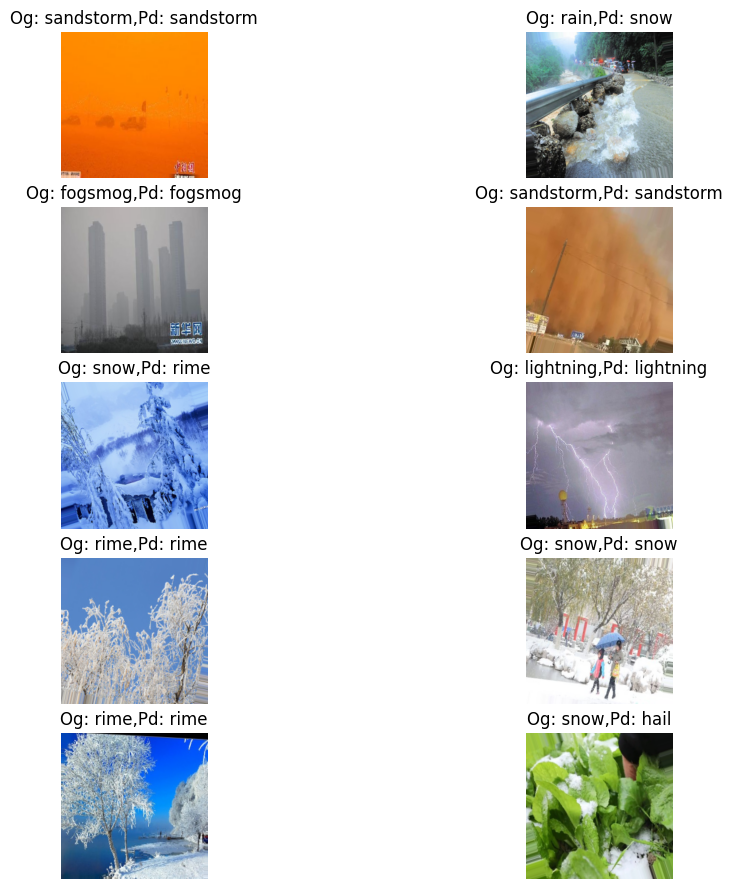

In [99]:
plt.figure(figsize=(11,11))
for ind in range(len(test_size_im)):
    image, label = test_size_im[ind], int(labels[ind])
    pred_label = class_labels[np.argmax(model_res.predict(image[np.newaxis,...]))]
    plt.subplot(5, 2, ind+1)
    plt.imshow(image)
    plt.title(f"Og: {class_labels[label]},Pd: {pred_label}")
    plt.axis('off')
plt.show()

# VGG16

In [14]:
from tensorflow.keras.applications import VGG16
vgg16_base = VGG16(weights='imagenet', include_top=False,input_shape=(256, 256, 3))
print(vgg16_base.summary())

2022-12-04 15:00:05.486952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 15:00:05.491682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 15:00:05.492658: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 15:00:05.494683: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

In [15]:
keras.backend.clear_session() 
for layer in vgg16_base.layers:
    layer.trainable = False   
model = tf.keras.models.Sequential([
        vgg16_base,
        keras.layers.Flatten(),    
        keras.layers.Dense(512, activation='relu'),           
        keras.layers.Dropout(0.5),                 
        keras.layers.Dense(256, activation='relu'),           
        keras.layers.Dense(11, activation='softmax')    
    ])
model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
cbs = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('vgg16' + ".h5", save_best_only=True)
]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 11)                2827      
Total params: 31,626,571
Trainable params: 16,911,883
Non-trainable params: 14,714,688
___________________________________

In [16]:
history_vgg = model.fit(train_ds,validation_data=valid_ds, epochs=50,callbacks=cbs)

2022-12-04 15:00:10.238285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-12-04 15:00:12.709711: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


310/310 [==============================] - 299s 932ms/step - loss: 1.6164 - accuracy: 0.4592 - val_loss: 0.9629 - val_accuracy: 0.6846
Epoch 2/50
310/310 [==============================] - 229s 740ms/step - loss: 1.1373 - accuracy: 0.5806 - val_loss: 0.7886 - val_accuracy: 0.7162
Epoch 3/50
310/310 [==============================] - 229s 738ms/step - loss: 1.0371 - accuracy: 0.6157 - val_loss: 0.7006 - val_accuracy: 0.7571
Epoch 4/50
310/310 [==============================] - 229s 740ms/step - loss: 0.9396 - accuracy: 0.6571 - val_loss: 0.6799 - val_accuracy: 0.7704
Epoch 5/50
310/310 [==============================] - 231s 745ms/step - loss: 0.8956 - accuracy: 0.6647 - val_loss: 0.5755 - val_accuracy: 0.8012
Epoch 6/50
310/310 [==============================] - 230s 741ms/step - loss: 0.8175 - accuracy: 0.7004 - val_loss: 0.5588 - val_accuracy: 0.8117
Epoch 7/50
310/310 [==============================] - 229s 738ms/step - loss: 0.7853 - accuracy: 0.7088 - val_loss: 0.5678 - val_accura

In [19]:
history_vgg = model.fit(train_ds,validation_data=valid_ds, epochs=25,callbacks=cbs)

Epoch 1/25
310/310 [==============================] - 238s 767ms/step - loss: 0.5127 - accuracy: 0.8181 - val_loss: 0.4403 - val_accuracy: 0.8599
Epoch 2/25
310/310 [==============================] - 228s 736ms/step - loss: 0.5139 - accuracy: 0.8186 - val_loss: 0.4311 - val_accuracy: 0.8676
Epoch 3/25
310/310 [==============================] - 228s 735ms/step - loss: 0.5008 - accuracy: 0.8246 - val_loss: 0.4473 - val_accuracy: 0.8713
Epoch 4/25
310/310 [==============================] - 228s 735ms/step - loss: 0.4972 - accuracy: 0.8212 - val_loss: 0.4478 - val_accuracy: 0.8567
Epoch 5/25
310/310 [==============================] - 228s 734ms/step - loss: 0.4674 - accuracy: 0.8335 - val_loss: 0.4142 - val_accuracy: 0.8672
Epoch 6/25
310/310 [==============================] - 227s 732ms/step - loss: 0.5236 - accuracy: 0.8105 - val_loss: 0.4613 - val_accuracy: 0.8551
Epoch 7/25
310/310 [==============================] - 226s 730ms/step - loss: 0.4929 - accuracy: 0.8251 - val_loss: 0.4009 -

In [20]:
history_vgg.history

{'loss': [0.512748658657074,
  0.5138875246047974,
  0.5007883906364441,
  0.4972164034843445,
  0.46741926670074463,
  0.5236232280731201,
  0.4929211437702179,
  0.4987778961658478,
  0.4796813726425171,
  0.4639180600643158,
  0.4933842718601227,
  0.46782195568084717,
  0.4637822210788727,
  0.47111883759498596],
 'accuracy': [0.8181359171867371,
  0.8186408281326294,
  0.8245986104011536,
  0.8211653232574463,
  0.8334848284721375,
  0.8104614615440369,
  0.8251035213470459,
  0.8183378577232361,
  0.8271231055259705,
  0.8358073234558105,
  0.8283348679542542,
  0.8342926502227783,
  0.8358073234558105,
  0.8361102938652039],
 'val_loss': [0.440269410610199,
  0.4310806691646576,
  0.44725167751312256,
  0.44781628251075745,
  0.4141786992549896,
  0.461336612701416,
  0.40091758966445923,
  0.4300071597099304,
  0.38607609272003174,
  0.40288862586021423,
  0.4433584213256836,
  0.4195716381072998,
  0.4129050374031067,
  0.3989538848400116],
 'val_accuracy': [0.859919011592865,

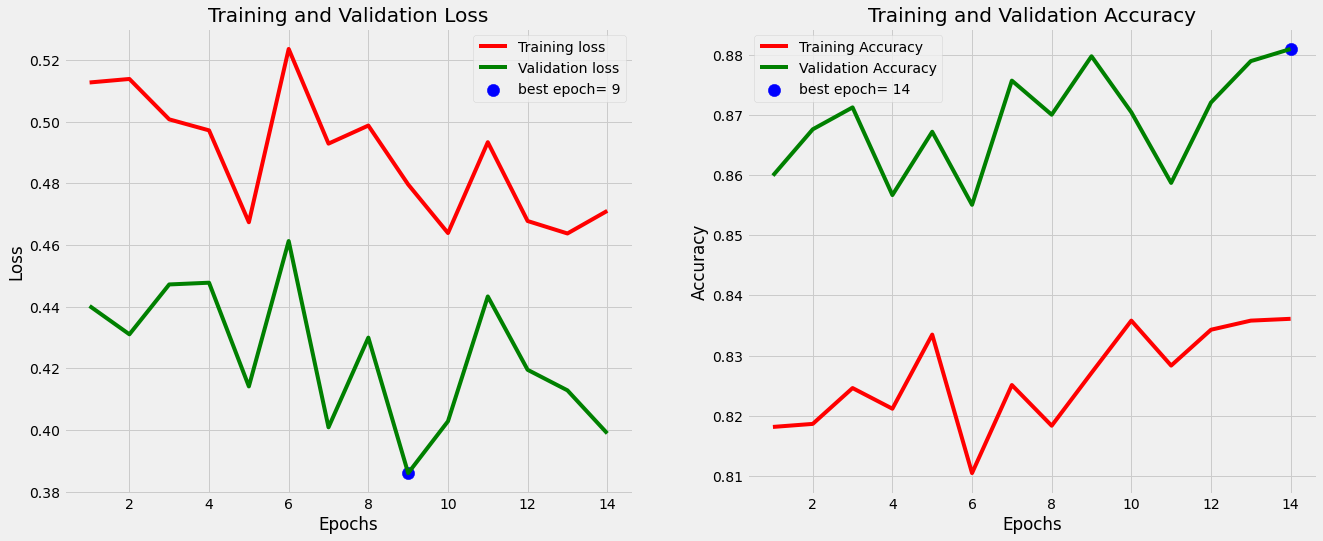

2/2 [==============================] - 5s 4s/step - loss: 2.4361 - accuracy: 0.5283


In [24]:
plot_training_validation_metrics(history_vgg,0)
acc=model.evaluate(test_gen, verbose=1, return_dict=False)[1]*100

## Evaluation

In [37]:
model = load_model('C:\\Users\\ayesh\\Desktop\\sem-1-IUB\\DM\\FINAL-PROJECT\\results\\models\\model_after_aug\\vgg16.h5')

1/1 [==============================] - 0s 22ms/step


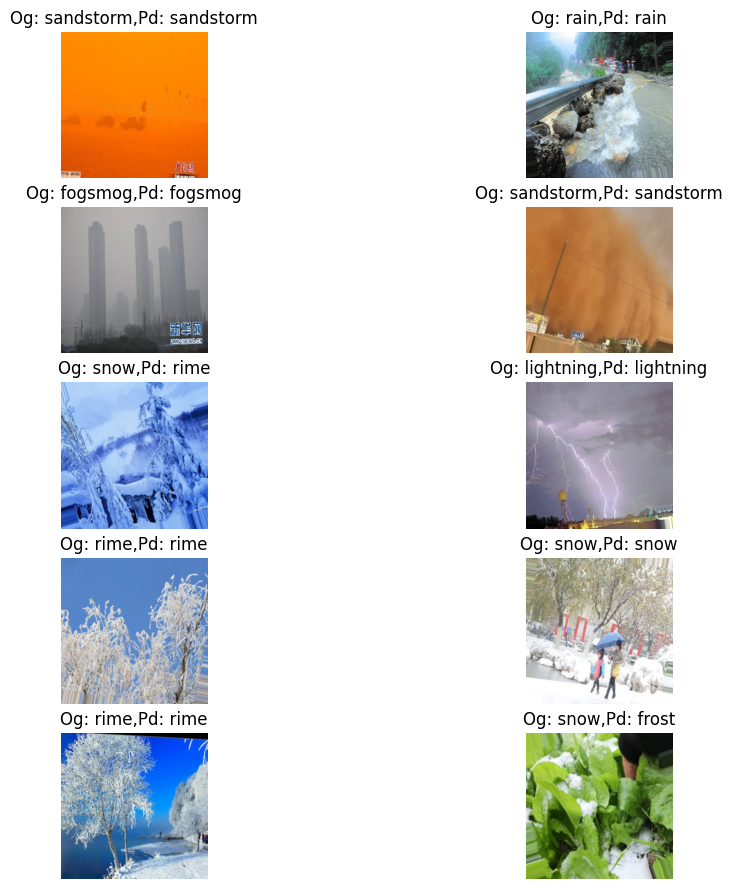

In [100]:
i=1
plt.figure(figsize=(11,11))
for ind in range(len(test_size_im)):
    image, label = test_size_im[ind], int(labels[ind])
    pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]
    plt.subplot(5, 2, ind+1)
    plt.imshow(image)
    plt.title(f"Og: {class_names[label]},Pd: {pred_label}")
    plt.axis('off')
plt.show()

# CNN

In [108]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),  input_shape = (256, 256, 3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(101, activation='softmax')
])
cbs = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('cnn' + ".h5", save_best_only=True)
]

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)       

In [96]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [97]:
history = model.fit(train_ds, validation_data=valid_ds, callbacks=cbs,epochs=20)

Epoch 1/20
310/310 [==============================] - 220s 709ms/step - loss: 1.9220 - accuracy: 0.3878 - val_loss: 1.2821 - val_accuracy: 0.6194
Epoch 2/20
310/310 [==============================] - 220s 710ms/step - loss: 1.2494 - accuracy: 0.5734 - val_loss: 1.0703 - val_accuracy: 0.6437
Epoch 3/20
310/310 [==============================] - 219s 708ms/step - loss: 1.1268 - accuracy: 0.6185 - val_loss: 1.0045 - val_accuracy: 0.6818
Epoch 4/20
310/310 [==============================] - 221s 712ms/step - loss: 1.0388 - accuracy: 0.6502 - val_loss: 0.9094 - val_accuracy: 0.6996
Epoch 5/20
310/310 [==============================] - 220s 710ms/step - loss: 0.9902 - accuracy: 0.6646 - val_loss: 0.8748 - val_accuracy: 0.7243
Epoch 6/20
310/310 [==============================] - 220s 708ms/step - loss: 0.9287 - accuracy: 0.6776 - val_loss: 0.8379 - val_accuracy: 0.7223
Epoch 7/20
310/310 [==============================] - 219s 708ms/step - loss: 0.8833 - accuracy: 0.6952 - val_loss: 0.8270 -

## Evaluation

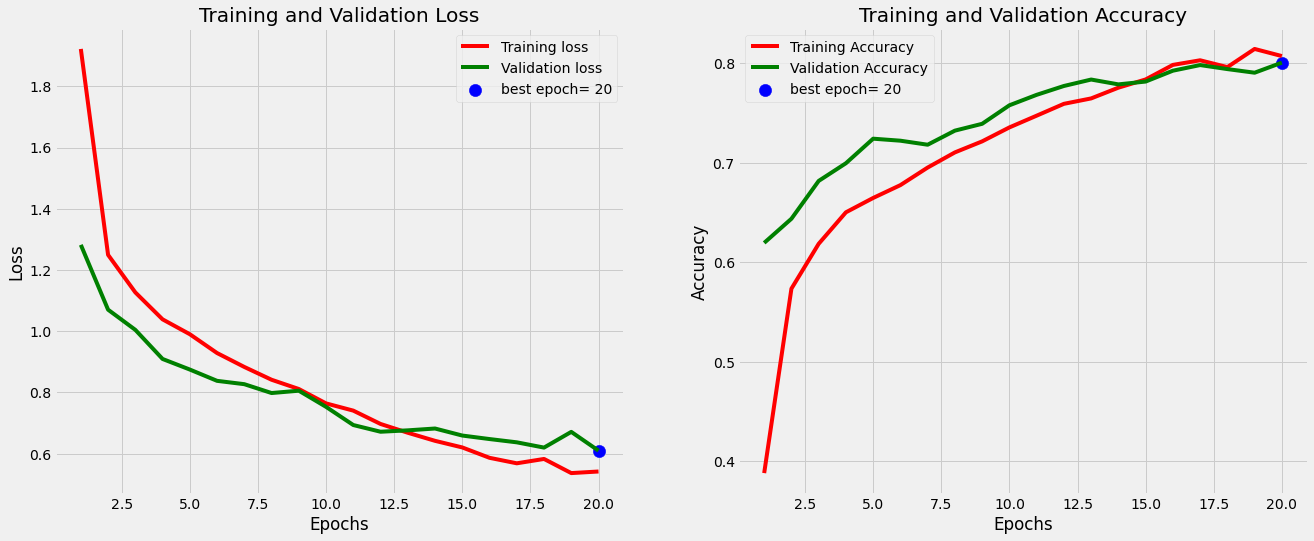

2/2 [==============================] - 2s 790ms/step - loss: 3.9102 - accuracy: 0.3585


In [98]:
plot_training_validation_metrics(history,0)
acc=model.evaluate( test_gen, verbose=1, return_dict=False)[1]*100

In [73]:
model_cnn = load_model('C:\\Users\\ayesh\\Desktop\\sem-1-IUB\\DM\\FINAL-PROJECT\\results\\models\\model_after_aug\\cnn.h5')

1/1 [==============================] - 0s 27ms/step


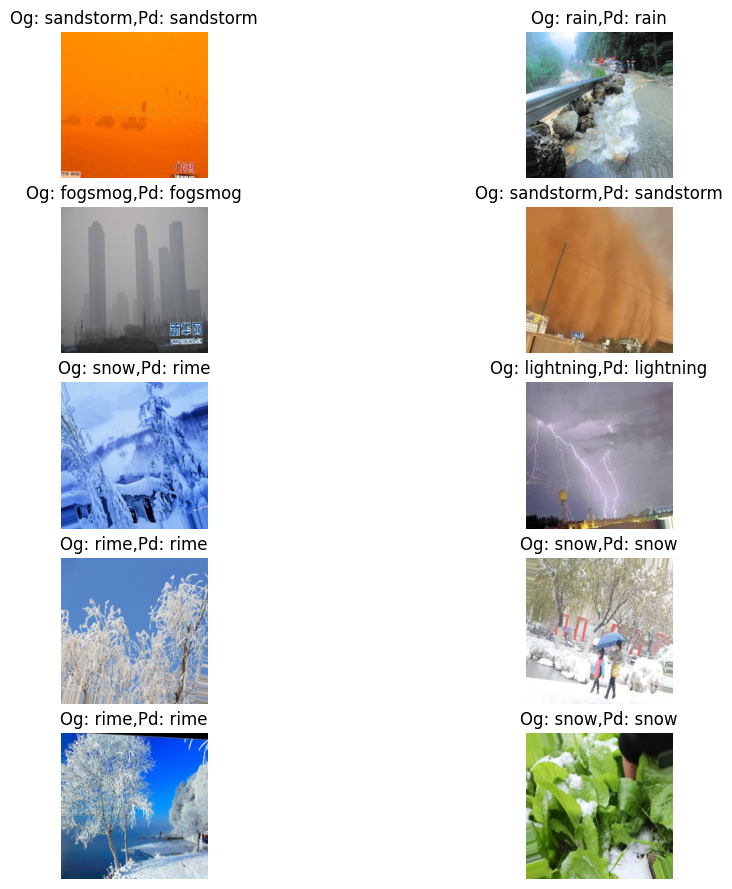

In [98]:
plt.figure(figsize=(11,11))
for ind in range(len(test_size_im)):
    image, label = test_size_im[ind], int(labels[ind])
    pred_label = class_labels[np.argmax(model_cnn.predict(image[np.newaxis,...]))]
    plt.subplot(5, 2, ind+1)
    plt.imshow(image)
    plt.title(f"Og: {class_labels[label]},Pd: {pred_label}")
    plt.axis('off')
plt.show()

# Xception

In [110]:
base_model = tf.keras.applications.xception.Xception(
    include_top=False,
    weights='imagenet',
)
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.outputs[0])
output = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)
model = tf.keras.Model(inputs = base_model.inputs, outputs = output)
model.summary()
base_model.trainable = False
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy'])
cbs = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('xception_model' + ".h5", save_best_only=True)
]
model.summary()

83683744/83683744 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                      

In [65]:
history= model.fit(train_ds, validation_data=valid_ds, callbacks=cbs,epochs=10)

Epoch 1/10
310/310 [==============================] - 233s 749ms/step - loss: 0.2644 - accuracy: 0.9130 - val_loss: 0.3606 - val_accuracy: 0.8838
Epoch 2/10
310/310 [==============================] - 231s 745ms/step - loss: 0.2533 - accuracy: 0.9169 - val_loss: 0.3365 - val_accuracy: 0.8883


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 3/10
310/310 [==============================] - 232s 747ms/step - loss: 0.2495 - accuracy: 0.9174 - val_loss: 0.3345 - val_accuracy: 0.8939
Epoch 4/10
310/310 [==============================] - 232s 748ms/step - loss: 0.2362 - accuracy: 0.9237 - val_loss: 0.3457 - val_accuracy: 0.8899
Epoch 5/10
310/310 [==============================] - 232s 748ms/step - loss: 0.2316 - accuracy: 0.9241 - val_loss: 0.3478 - val_accuracy: 0.8879
Epoch 6/10
310/310 [==============================] - 230s 743ms/step - loss: 0.2211 - accuracy: 0.9286 - val_loss: 0.3329 - val_accuracy: 0.8887
Epoch 7/10
310/310 [==============================] - 230s 744ms/step - loss: 0.2150 - accuracy: 0.9295 - val_loss: 0.3282 - val_accuracy: 0.8879
Epoch 8/10
310/310 [==============================] - 231s 744ms/step - loss: 0.2110 - accuracy: 0.9338 - val_loss: 0.3284 - val_accuracy: 0.8911
Epoch 9/10
310/310 [==============================] - 231s 746ms/step - loss: 0.2030 - accuracy: 0.9351 - val_loss: 0.3172 -

## Evaluation

In [75]:
model_xcep = load_model('C:\\Users\\ayesh\\Desktop\\sem-1-IUB\\DM\\FINAL-PROJECT\\results\\models\\model_after_aug\\xception_model.h5')

1/1 [==============================] - 0s 27ms/step


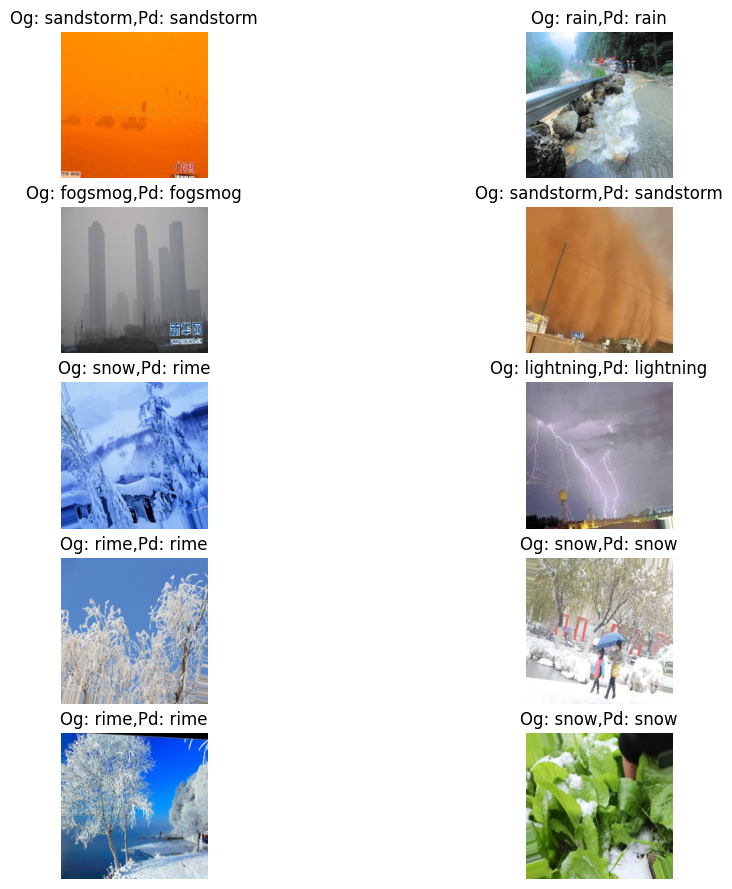

In [95]:
plt.figure(figsize=(11,11))
for ind in range(len(test_size_im)):
    image, label = test_size_im[ind], int(labels[ind])
    pred_label = class_names[np.argmax(model_xcep.predict(image[np.newaxis,...]))]
    plt.subplot(5, 2, ind+1)
    plt.imshow(image)
    plt.title(f"Og: {class_names[label]},Pd: {pred_label}")
    plt.axis('off')
plt.show()

In [64]:
model.evaluate(valid_ds)

78/78 [==============================] - 47s 600ms/step - loss: 0.3476 - accuracy: 0.8757


[0.34757402539253235, 0.8757085204124451]

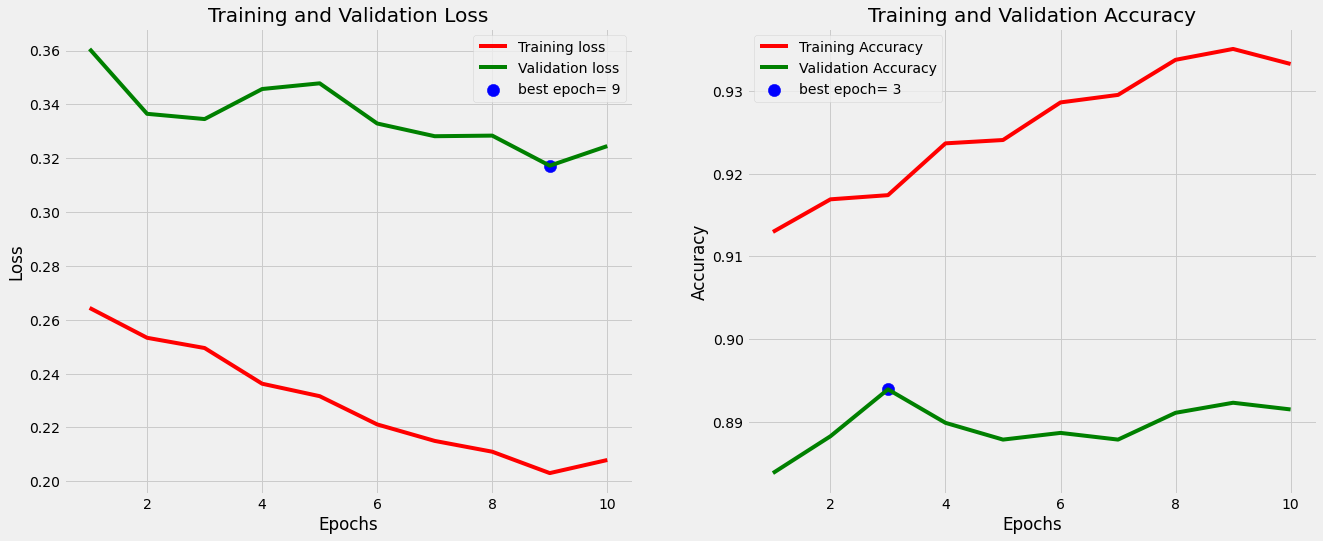

2/2 [==============================] - 2s 804ms/step - loss: 3.2285 - accuracy: 0.5472


In [82]:
plot_training_validation_metrics(history,0)
acc=model.evaluate(test_gen, verbose=1, return_dict=False)[1]*100